<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessment_rrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")


!pip install category_encoders -q


%matplotlib inline


from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Read Data

df_car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')

df_car.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [44]:

# Check info
df_car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [53]:
# Drop High Cardinality columns:
df = df_car.drop(columns = ['public_reference'])
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [35]:
# Convert the "year_of_registration	" column from numeric to object (string) data type
#df['year_of_registration'] = df['year_of_registration'].astype(str)


In [30]:
# # Convert the column to numeric for reg_code
# df['reg_code'].replace('nan', np.nan, inplace = True)

# df['reg_code'] = pd.to_numeric(df['reg_code'], errors = 'coerce')

# # Convert the column to numeric for year_of_registration
# df['year_of_registration'].replace('nan', np.nan, inplace = True)

# df['year_of_registration'] = pd.to_numeric(df['year_of_registration'], errors = 'coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   reg_code               370148 non-null  object 
 2   standard_colour        396627 non-null  object 
 3   standard_make          402005 non-null  object 
 4   standard_model         402005 non-null  object 
 5   vehicle_condition      402005 non-null  object 
 6   year_of_registration   402005 non-null  object 
 7   price                  402005 non-null  int64  
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 31.1+ MB


In [11]:
# Use describe() to get the central tendency and other summary statistics
summ_stat = df.describe()

# Display the results
print(summ_stat)

             mileage       reg_code  year_of_registration         price
count  401878.000000  367233.000000         368694.000000  4.020050e+05
mean    37743.595656      40.437578           2015.006206  1.734197e+04
std     34831.724018      25.204174              7.962667  4.643746e+04
min         0.000000       2.000000            999.000000  1.200000e+02
25%     10481.000000      16.000000           2013.000000  7.495000e+03
50%     28629.500000      54.000000           2016.000000  1.260000e+04
75%     56875.750000      66.000000           2018.000000  2.000000e+04
max    999999.000000      95.000000           2020.000000  9.999999e+06


In [40]:
cat_feat = ['standard_colour', 'standard_make', 'standard_model','vehicle_condition',
            'body_type', 'crossover_car_and_van', 'fuel_type','year_of_registration','reg_code']
num_feat = ['mileage']

# Calculate mean of each column

mean_values = df[num_feat].mean()

# Calculate mode of each column
mode_values = df[cat_feat].mode().iloc[0]
[mean_values, mode_values]

[mileage    37743.595656
 dtype: float64,
 standard_colour              Black
 standard_make                  BMW
 standard_model                Golf
 vehicle_condition             USED
 body_type                Hatchback
 crossover_car_and_van        False
 fuel_type                   Petrol
 year_of_registration        2017.0
 reg_code                        17
 Name: 0, dtype: object]

In [60]:


# Create a SimpleImputer instance for replacing zero values with the mean of each column
mean_impu = SimpleImputer(strategy='mean', fill_value = 0.0)

# Create a SimpleImputer instance for filling missing values with the most frequent value (for categorical columns)
mode_impu = SimpleImputer(strategy='most_frequent')

# Identify the numeric and categorical columns
num_col = df.select_dtypes(include=['float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

# Fit and transform the DataFrame with the mean imputer for numeric columns
df[num_col] = mean_impu.fit_transform(df[num_col])

# Fit and transform the DataFrame with the mode imputer for categorical columns
df[cat_col] = mode_impu.fit_transform(df[cat_col])



In [61]:
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,17,Grey,Volvo,XC90,NEW,2015.006206,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.000000,7000.0,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.000000,14000.0,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.000000,7995.0,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.000000,26995.0,SUV,False,Diesel


In [52]:
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,17,Grey,Volvo,XC90,NEW,2015.006206,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.000000,7000.0,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.000000,14000.0,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.000000,7995.0,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.000000,26995.0,SUV,False,Diesel


In [42]:
# Replace missing values with the mean for numeric columns
from sklearn.impute import SimpleImputer
# num_col = df.select_dtypes(include=[np.number]).columns
imp_num = SimpleImputer(missing_values=0, strategy='mean').set_output(transform='pandas')
imp_num.fit_transform(df[num_feat])

#df_car_c[num_col] = df_car_c[num_col].fillna(df_car_c[num_col].mean())

# Replace missing values with the mode for categorical columns
cat_col = df.select_dtypes(include=['object']).columns
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

ValueError: ignored

In [21]:
# fill missing values
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')
# imp_cat.fit_transform(df[cat_feat])

imp_num = SimpleImputer(missing_values=0, strategy='mean').set_output(transform='pandas')
# imp_num.fit_transform(df[num_feat])

# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns

df_head()


ValueError: ignored

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=0, strategy='median').set_output(transform='pandas')
imp.fit(X_train)

# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')


# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns


#[num_cols.shape, cate_cols.shape]
num_cols[0]

# Impute missing values for numeric and categorical features

df_car_c[num_cols] = num_imputer.fit_transform(df_car[num_cols])

df_car_c[cate_cols] = cate_imputer.fit_transform(df_car[cate_cols])

X = tc[ cat_feat + num_feat ]
y = tc[target]

ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

ohe.fit(X_train[cat_feat])

X_train_enc = ohe.transform(X_train[cat_feat])

X_test_enc = ohe.transform(X_test[cat_feat])

scaler = MinMaxScaler()

scaler.fit(X_train[num_feat])
X_train_scaled = scaler.transform(X_train[num_feat])

X_train_scaled = scaler.transform(X_train[num_feat])
X_test_scaled = scaler.transform(X_test[num_feat])

X_train_tr = pd.concat([X_train_enc, X_train_scaled], axis=1)

X_test_tr = pd.concat([X_test_enc, X_test_scaled], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_test_tr = pd.concat([X_test_enc, X_test_scaled], axis=1)

imp.fit(X_train_tr)
imp = SimpleImputer()



In [ ]:
# 1
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model to your data
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_



# Feature Selection Method 1
correlation_matrix = df.corr()
selected_features = correlation_matrix['target'].abs().sort_values(ascending=False).head(10).index
X_selected = X_train[selected_features]

# Feature Selection Method 2
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = kbest_selector.fit_transform(X_train, y_train)

# Feature Selection 3
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create the model
model = SVC(kernel="linear")

# Use RFE for feature selection
rfe_selector = RFE(model, n_features_to_select=5)
X_selected = rfe_selector.fit_transform(X_train, y_train)

# tree based selector
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

#  mutual info
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features based on mutual information
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = kbest_selector.fit_transform(X_train_categorical, y_train)




In [ ]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#np.random.seed(0)

In [ ]:
# create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
# Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

#   Using the prediction pipeline in a grid search
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__C": [0.1, 1.0, 10, 100],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=10, random_state=0)
search_cv
# fit
search_cv.fit(X_train, y_train)
# print best estimator
print("Best params:")
print(search_cv.best_params_)

# in data frame
import pandas as pd

cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_preprocessor__cat__selector__percentile",
        "param_classifier__C",
    ]
].head(5)

# accuracy of the best model
print(
    "accuracy of the best model from randomized search: "
    f"{search_cv.score(X_test, y_test):.3f}"
)



#  from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have data X and y, where X has both numerical and categorical features

# Define the numerical features and categorical features
numerical_features = [...]  # List of numerical feature column names
categorical_features = [...]  # List of categorical feature column names

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('selector', SelectPercentile(percentile=50)),  # You can adjust the percentile value
        ]), categorical_features)
    ])

# Create a pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X, y)


# Certainly! SelectPercentile is a feature selection technique provided by scikit-learn. It is part of the feature_selection
#  module and is designed to select a specified percentage of the highest-scoring features based on a univariate statistical test.

# Here's how it works in more detail:

# Univariate Statistical Test:

# SelectPercentile operates on individual features independently, without considering the relationships between features.
# It applies a statistical test to each feature separately to determine its importance.
# Feature Scores:

# After applying the statistical test, each feature is assigned a score.
# The scores represent the strength of the relationship between each feature and the target variable.
# Selection of Features:

# SelectPercentile then selects a specified percentage of features with the highest scores.
# The percentage is set using the percentile parameter.
# Common Statistical Tests:

# The choice of the statistical test is determined by the score_func parameter.
# Common options include:
# For classification tasks: f_classif (ANOVA F-value), chi2 (chi-squared statistic), etc.
# For regression tasks: f_regression (F-value for regression), mutual_info_regression (mutual information).
# Here's an example of how you might use SelectPercentile

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessor (including feature selection) and regressor
pipeline = Pipeline([
    ('preprocessor', SimpleImputer(strategy='mean')),  # You may adjust the imputer strategy
    ('selector', SelectPercentile(score_func=f_regression, percentile=50)),  # Select top 50%
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "selector__percentile": [10, 30, 50, 70],
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0, scoring='neg_mean_squared_error', cv=5)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X_train, y_train)

# Get the best model
best_model = search_cv.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


#
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessor (including feature selection) and regressor
pipeline = Pipeline([
    ('preprocessor', SimpleImputer(strategy='mean')),  # You may adjust the imputer strategy
    ('selector', SelectPercentile(score_func=f_regression, percentile=50)),  # Select top 50%
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "selector__percentile": [10, 30, 50, 70],
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0, scoring='neg_mean_squared_error', cv=5)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X_train, y_train)

# Get the best model
best_model = search_cv.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


In [ ]:
# Drop High Cardinality columns:
df_car = df_car.drop(columns = ['public_reference'])
df_car.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


<Axes: xlabel='mileage'>

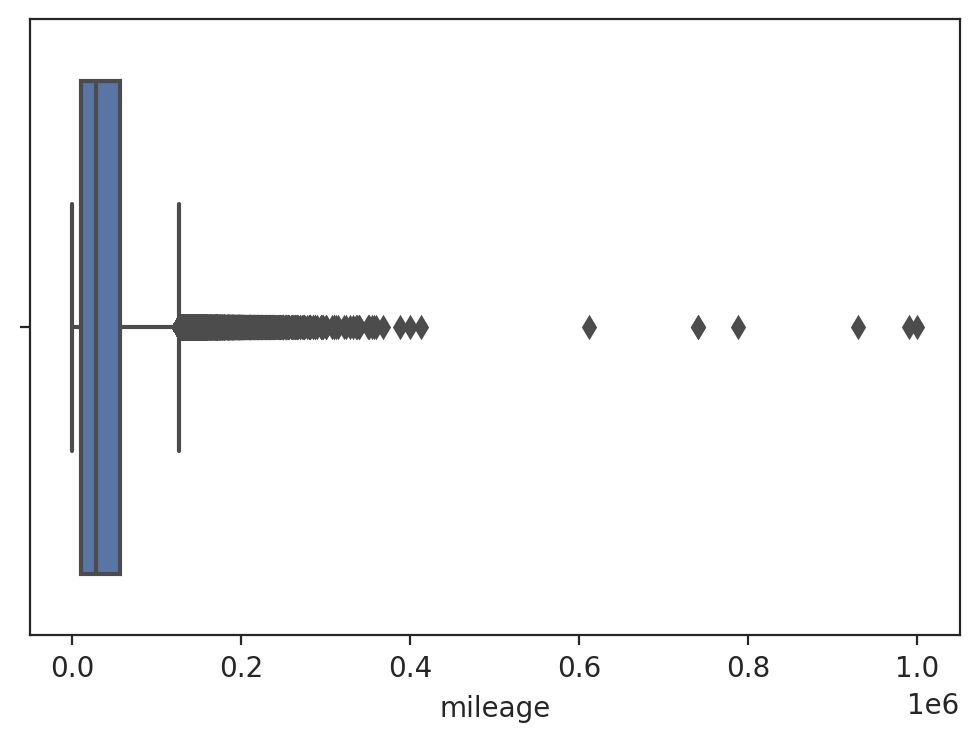

In [ ]:
sns.boxplot(data = df_car, x = 'mileage')

<Axes: xlabel='mileage'>

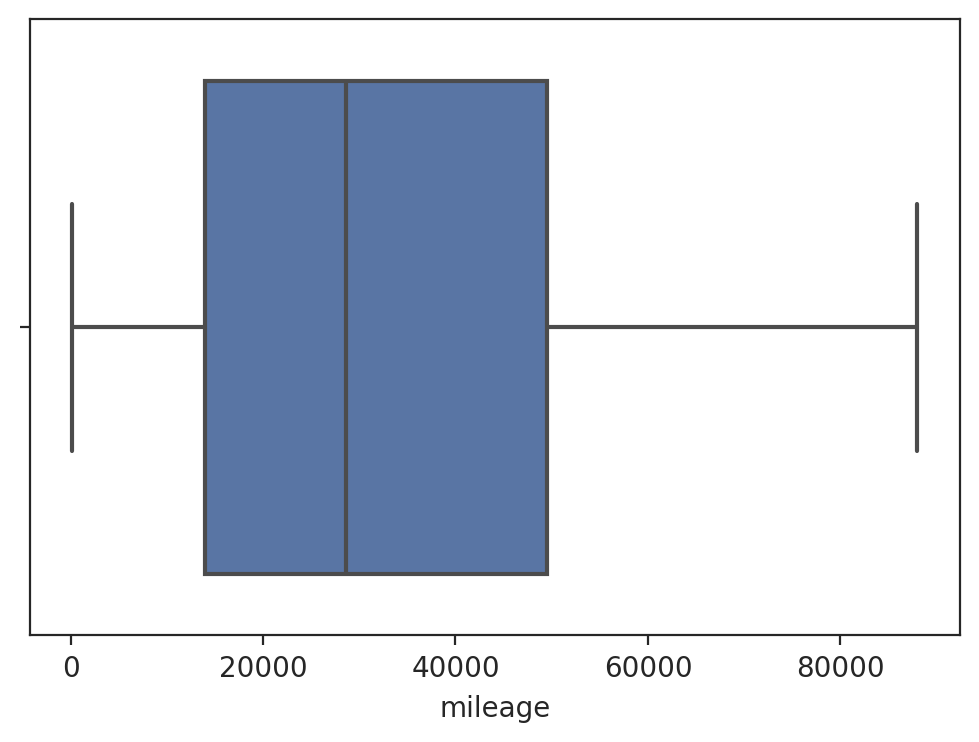

In [ ]:
 # Subset data: Remove outliers for numeric
lo_m, hi_m = df_car["mileage"].quantile([0.1, 0.9])
mask_m = df_car["mileage"].between(lo_m, hi_m)
df_car = df_car[mask_m]

sns.boxplot(data = df_car, x = 'mileage')

<Axes: xlabel='year_of_registration'>

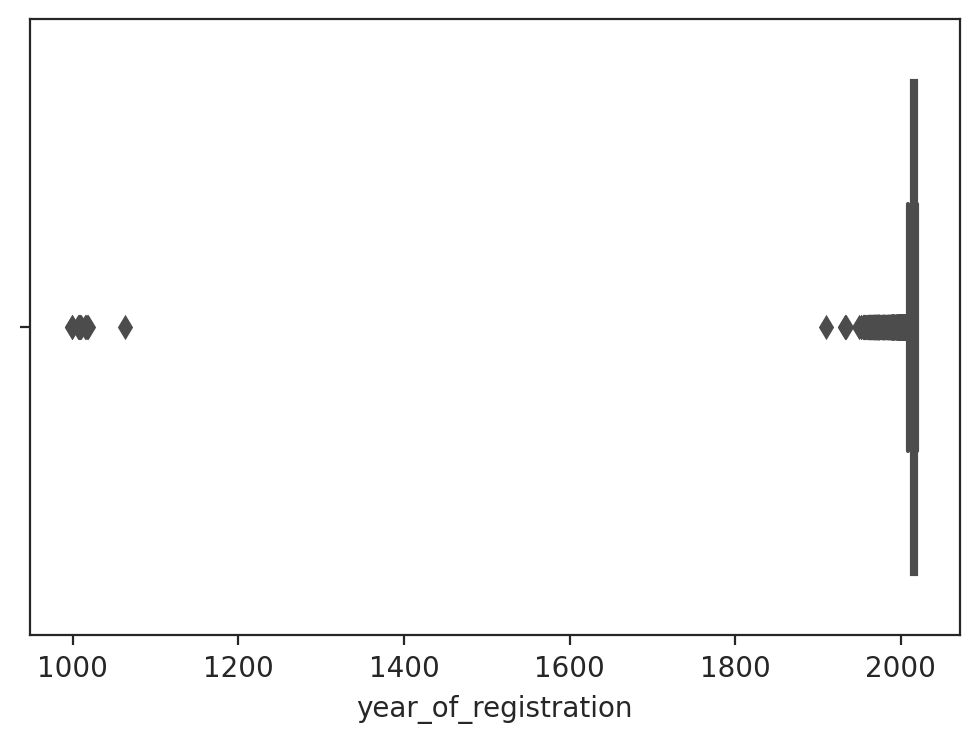

In [ ]:
sns.boxplot(data = df_car, x = 'year_of_registration')

<Axes: xlabel='year_of_registration'>

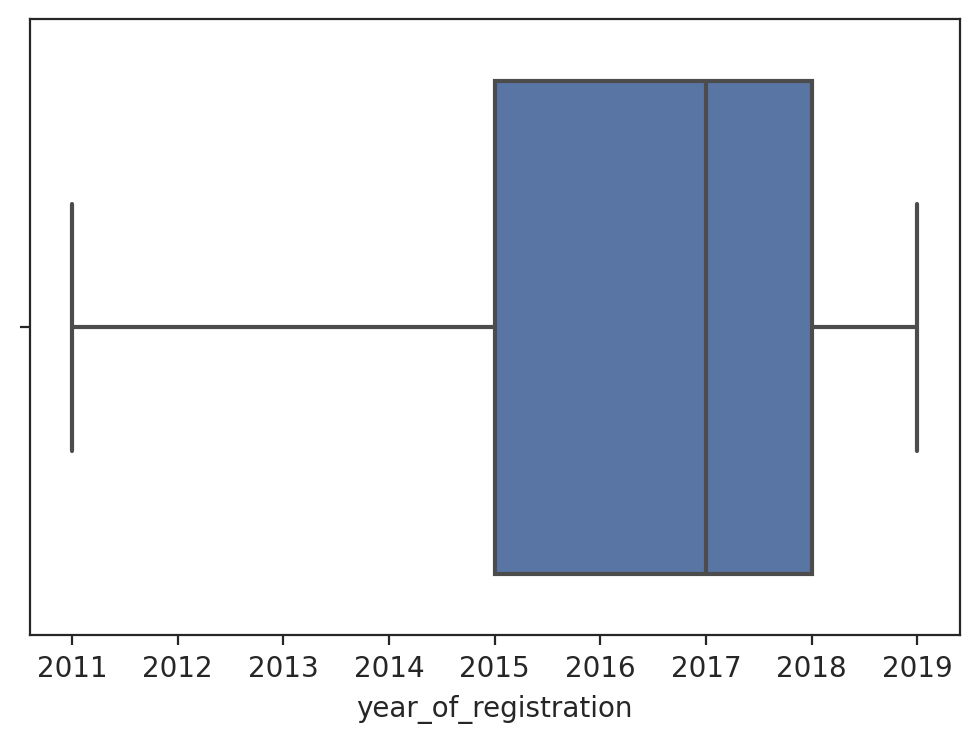

In [ ]:
# Subset data: Remove outliers for numeric
lo_y, hi_y = df_car["year_of_registration"].quantile([0.1, 0.9])
mask_y = df_car["year_of_registration"].between(lo_y, hi_y)
df_car = df_car[mask_y]

sns.boxplot(data = df_car, x = 'year_of_registration')

In [ ]:
# Convert the column to numeric for reg_code
df_car['reg_code'].replace('nan', np.nan, inplace = True)

df_car['reg_code'] = pd.to_numeric(df_car['reg_code'], errors = 'coerce')

<Axes: xlabel='reg_code'>

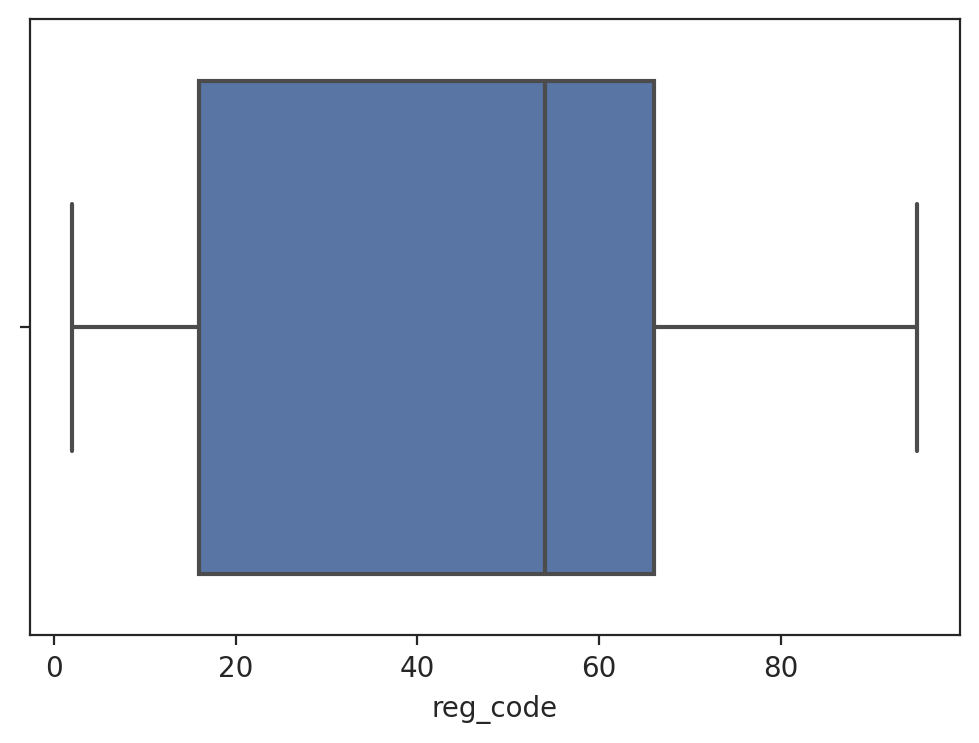

In [ ]:
sns.boxplot(data = df_car, x = 'reg_code')

<Axes: xlabel='reg_code'>

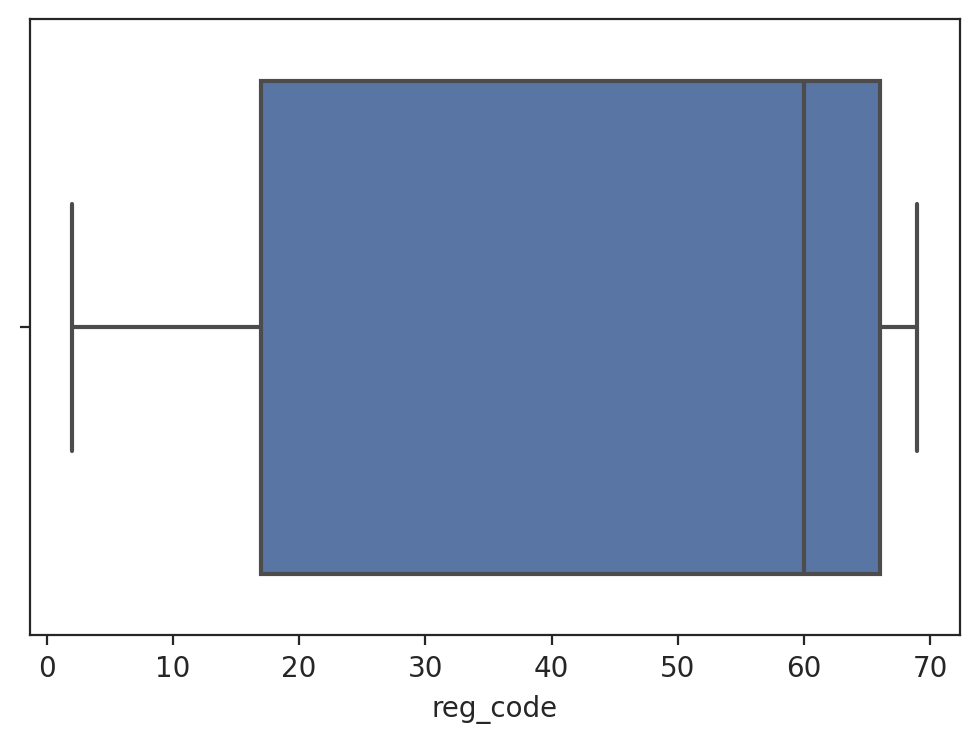

In [ ]:
# Convert the column to numeric for reg_code
df_car['reg_code'].replace('nan', np.nan, inplace = True)

df_car['reg_code'] = pd.to_numeric(df_car['reg_code'], errors = 'coerce')

sns.boxplot(data = df_car, x = 'reg_code')

In [ ]:
 # Subset data: Remove outliers for numeric
lo_r, hi_r = df_car["reg_code"].quantile([0.1, 0.9])
mask_r = df_car["reg_code"].between(lo_r, hi_r)
df = df_car[mask_r]

In [ ]:
 # Subset data: Remove outliers for numeric
lo_m, hi_m = df_car["mileage"].quantile([0.1, 0.9])
mask_m = df_car["mileage"].between(lo_r, hi_r)
df = df_car[mask_m]

<Axes: xlabel='reg_code'>

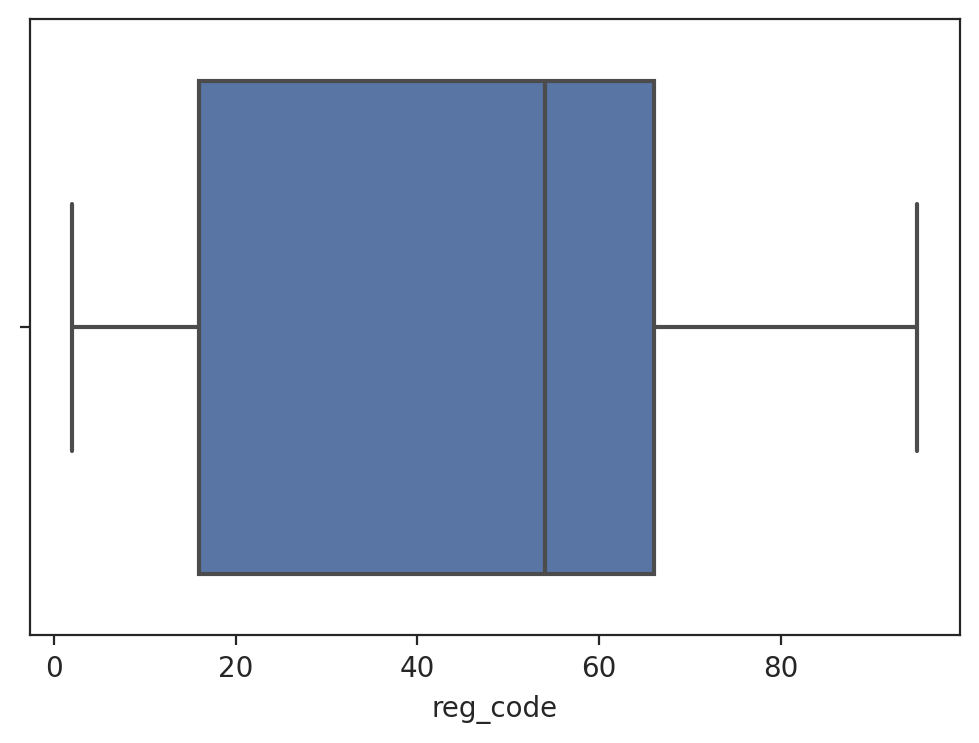

In [ ]:
sns.boxplot(data = df_car, x = 'reg_code')

<Axes: xlabel='reg_code'>

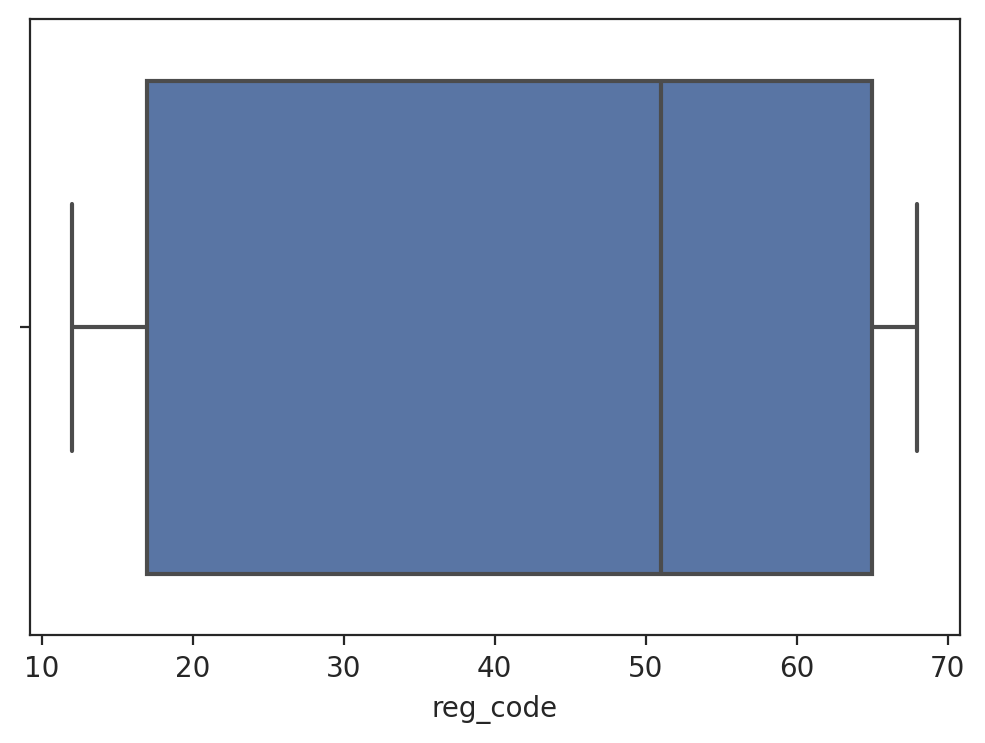

In [ ]:
sns.boxplot(data = df, x = 'reg_code')

In [ ]:
from sklearn.compose import ColumnTransformer


target = 'price'
cat_feat = ['standard_colour', 'standard_make', 'standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'  ]
num_feat = ['mileage', 'reg_code', 'year_of_registration']

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

knn_pp_cat = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, drop='if_binary'),
    KNeighborsClassifier(n_neighbors=11)
)




In [ ]:
knn_pp_cat.fit(X_train[cat_feat], y_train)

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler())
    ]
)

In [ ]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False, drop='if_binary')),
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feat),
        ("cat", categorical_transformer, cat_feat),
    ]
)

In [ ]:
preprocessor.fit_transform(X_train)

In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=11))]
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
imp = SimpleImputer(missing_values=0, strategy='median').set_output(transform='pandas')

In [ ]:
# Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   368694 non-null  float64
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 28.0+ MB


In [ ]:
# Convert the "year_of_registration	" column from numeric to object (string) data type
df_car_c['year_of_registration'] = df_car_c['year_of_registration'].astype(str)


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 28.0+ MB


In [ ]:
# Calculate the mean of the "Value" column
mean_value = df_car_c[['mileage', 'price']].mean()

# Calculate the mode of the "Value" column
mode_value = df_car_c[['standard_colour', 'standard_make', 'standard_model',
        'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type']].mode().iloc[0]
[mean_value, mode_value]


[mileage    37743.595656
 price      17341.965799
 dtype: float64,
 standard_colour             Black
 standard_make                 BMW
 standard_model               Golf
 vehicle_condition            USED
 year_of_registration       2017.0
 body_type               Hatchback
 fuel_type                  Petrol
 Name: 0, dtype: object]

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Replace missing values with the mean for numeric columns
num_col = df_car_c.select_dtypes(include=[np.number]).columns
df_car_c[num_col] = df_car_c[num_col].fillna(df_car_c[num_col].mean())

# Replace missing values with the mode for categorical columns
cat_col = df_car_c.select_dtypes(include=['object']).columns
df_car_c[cat_col] = df_car_c[cat_col].fillna(df_car_c[cat_col].mode().iloc[0])

# Print the DataFrame after filling
df_car_c.head()


,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')


# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns


#[num_cols.shape, cate_cols.shape]
num_cols[0]


'mileage'

In [ ]:
# Impute missing values for numeric and categorical features

df_car_c[num_cols] = num_imputer.fit_transform(df_car[num_cols])

df_car_c[cate_cols] = cate_imputer.fit_transform(df_car[cate_cols])



In [ ]:
df_car_c[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   mileage  402005 non-null  float64
 1   price    402005 non-null  float64
dtypes: float64(2)
memory usage: 6.1 MB


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  float64
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), object(7)
memory usage: 28.0+ MB


In [ ]:
# Get the total count of missing values in each column
df_car_c.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000.0,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000.0,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995.0,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995.0,SUV,False,Diesel


In [ ]:
df_car_c.iloc[0,0]

0.0

In [ ]:
# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])

In [ ]:
# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')

# Identify numeric, categorical, boolean columns
num_cols = car_df.select_dtypes(include=['number']).columns
cate_cols = car_df.select_dtypes(include=['object']).columns
bool_cols = car_df.select_dtypes(include=['bool']).columns

# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])


# Impute missing values for boolean features with the most frequent value
for i in bool_cols:
    most_frequent_value = car_df[i].mode()[0]
    car_df[i].fillna(most_frequent_value, inplace=True)



In [ ]:
# Get the total count of missing values in each column
car_df.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Melt the DataFrame to long format for boxplot
df_melted = pd.melt(car_df, id_vars=[], value_vars=car_df.columns, var_name='standard_colour')

# Create a boxplot for multiple categorical columns
plt.figure(figsize=(12, 8))
sns.boxplot(x='standard_colour', data=df_melted, palette='Set2')
plt.title('Boxplot of Category Counts for Several Categorical Columns')
plt.show()


TypeError: ignored

<Figure size 1200x800 with 0 Axes>

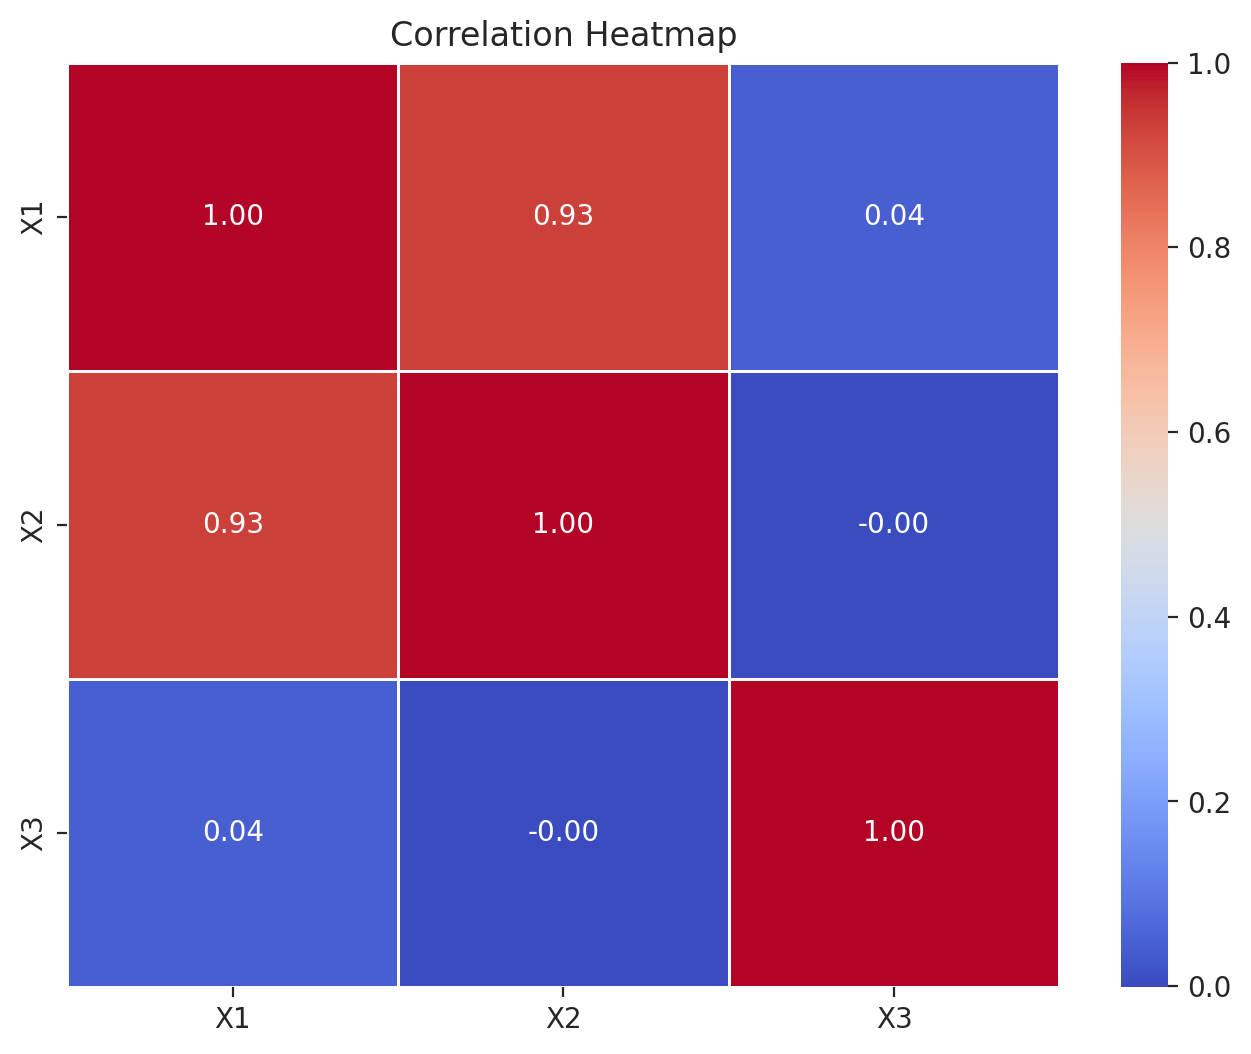

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame with three correlated variables
data = {
    'X1': np.random.rand(100),
    'X2': 2 * np.random.rand(100) + 0.5,
    'X3': 3 * np.random.rand(100) - 1
}

df = pd.DataFrame(data)

# Introducing multicollinearity by creating a linear relationship between X1 and X2
df['X2'] = df['X1'] + np.random.normal(scale=0.1, size=len(df))

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


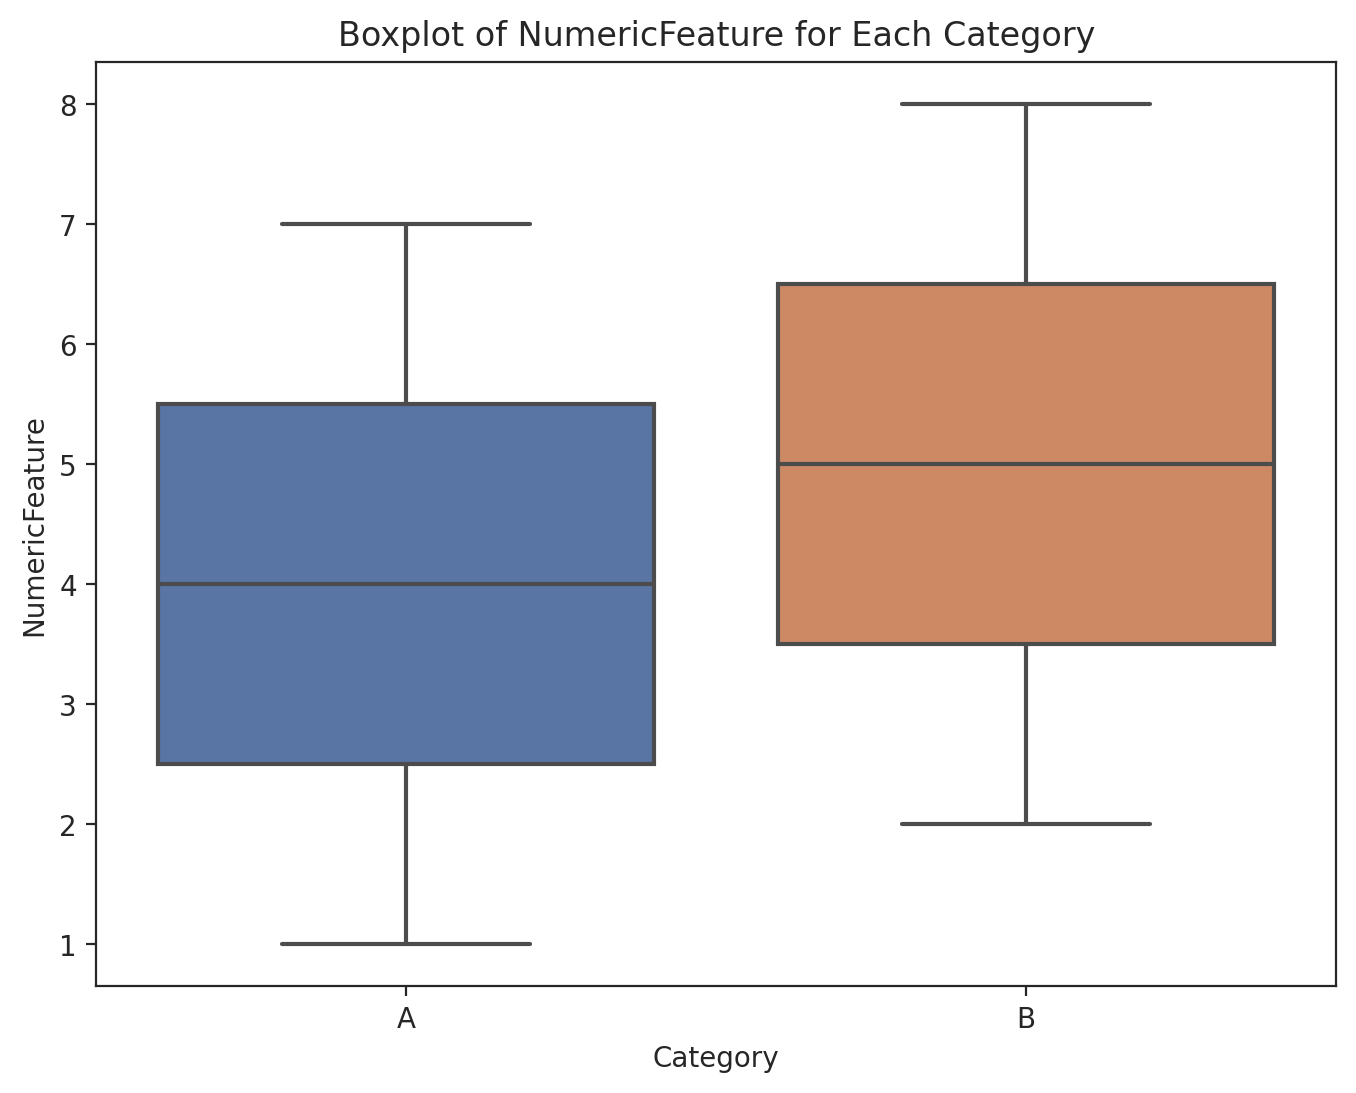

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with a categorical feature and a numerical feature
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'NumericFeature': [1, 2, 3, 4, 5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='NumericFeature', data=df)
plt.title('Boxplot of NumericFeature for Each Category')
plt.show()
